In [53]:
import matplotlib.pyplot as plt

In [91]:
def plot(sparsity_ratio, original, corrupted_data, layerwise_rearrange, net='resnet32', pruner='GraSP'):
    plt.figure(figsize=(7, 5))
    
    plt.plot(sparsity_ratio, original, label='original', color='tab:blue', marker='s')
    plt.plot(sparsity_ratio, layerwise_rearrange, label='layerwise rearrange', color='tab:red', marker='s')
    plt.plot(sparsity_ratio, corrupted_data, label='corrupted data', color='orange', marker='s')
    
    plt.title(pruner + '; ' + net)
    plt.xlabel('Sparsity Ratio')
    plt.ylabel('Test Accuracy')
    # plt.xscale('logit')
    # plt.gca().xaxis.set_minor_formatter(NullFormatter())
    plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.ylim([87.5, 94.5])
    plt.yticks([88, 90, 92, 94])
    plt.grid()
    
    plt.legend()
    plt.show()

In [92]:
sparsity_ratio = [0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 0.99]

original_resnet = [94, 93.37, 93.25, 92.42, 91.21, 88.78, 85.77]
corrupted_resnet = [93.72, 93.62, 93.31, 92.48, 91.33, 88.95, 85.50]
rearranged_resnet = [93.83, 93.94, 93.14, 92.44, 91.59, 89.33, 85.80]

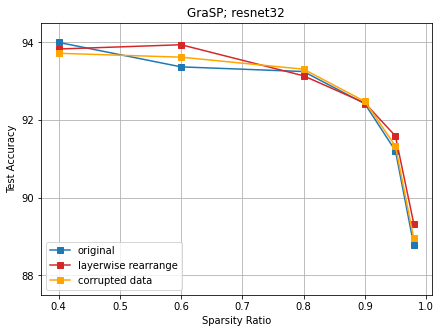

In [97]:
plot(sparsity_ratio[:-1], original_resnet[:-1], corrupted_resnet[:-1], rearranged_resnet[:-1])

In [94]:
sparsity_ratio = [0.4, 0.6, 0.8, 0.9, 0.95, 0.98, 0.99]

original_vgg = [93.57, 93.52, 93.46, 93.15, 92.99, 92.21, 91.10]
corrupted_vgg = [93.10, 92.94, 93.36, 93.21, 92.87, 92.08, 91.38]
rearranged_vgg = [93.48, 93.72, 92.96, 93.42, 92.92, 92.14, 91.29]

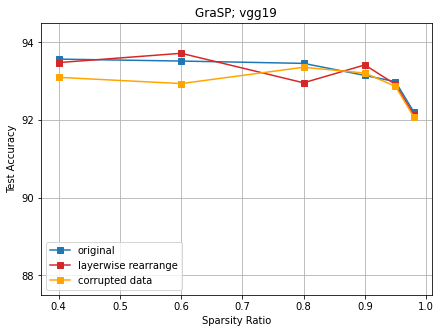

In [98]:
plot(sparsity_ratio[:-1], original_vgg[:-1], corrupted_vgg[:-1], rearranged_vgg[:-1], 'vgg19', 'GraSP')